In [48]:
#import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

Global Confirmed covid cases, recovered and deaths - Loading the data used in this worksheet from Covid-19 CSV dataset file.


Link: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

1.Data Loading

In [49]:
data_confirmedcase = pd.read_csv("time_series_covid19_confirmed_global.csv")

In [50]:
data_confirmedcase.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,11/18/22,11/19/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,204287,204392,204417,204510,204610,204724,204820,204982,205009,205039
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333103,333125,333138,333156,333161,333197,333215,333233,333233,333246
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,270917,270924,270929,270939,270952,270969,270981,270996,270996,271011
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46664,46664,46664,46664,46664,46664,46824,46824,46824,46824
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131


In [51]:
data_deathcase = pd.read_csv("time_series_covid19_deaths_global.csv")

In [52]:
data_deathcase.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,11/18/22,11/19/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7829,7829,7829,7829,7829,7829,7830,7830,7830,7831
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3593,3593,3593,3593,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,155,155,155,155,155,155,156,156,156,156
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [53]:
data_recoveredcase = pd.read_csv("time_series_covid19_recovered_global.csv")

In [54]:
data_recoveredcase.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,11/18/22,11/19/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2.Data Cleaning

In this phase we are cleaning the data on all three data sets

Since the above data has similar schema, so we will be applying a common function: def apply_data_cleaning()

This method will help in Data Cleaning by dropping unneccessary columns, Re-Setting and Setting the index values. Also we will be updating date column to perform grouping on column(Axis=1). Finally, we will get the covid-19 cases number grouped by month

In [55]:
#Data Cleaning process
#creating a method in order to clean the data
def data_cleaning(df):

    #Dropping irrelevant Columns from the Data Frame 
    new_df = df.drop(['Province/State','Lat','Long'], axis=1)
    
    #Rename the Date columns to Year_Month to group them and generate monthly data for COVID numbers,
    #which will provide an overview to analyze trends countrywise.
    
    date_columns = [pd.to_datetime(col).strftime("%Y_%m") for col in new_df.columns[1:]]
    new_df.columns = [new_df.columns[0]] + date_columns
    print(new_df.head())
    
    result = new_df.groupby(new_df.columns, axis=1).sum()
    
    regions = result['Country/Region']
    
    #Dropping the Country/Region column
    result.drop('Country/Region', axis=1, inplace = True)
    
    #Appending the Country/Region Column at the begining
    result.insert(loc=0, column='Country/Region', value=regions)
    
    '''#Remove Any Zero Value Column'''
    result = result.loc[(result != 0).any(axis=1)]
    
    '''Rename Country/Region column to Country'''
    result.rename(columns={'Country/Region': "Country"}, inplace=True)


    return result


DATA CLEANING

In [56]:
confirmed_cases = data_cleaning(data_confirmedcase)
confirmed_cases

  Country/Region  2020_01  2020_01  2020_01  2020_01  2020_01  2020_01  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   2020_01  2020_01  2020_01  ...  2022_11  2022_11  2022_11  2022_11  \
0        0        0        0  ...   204287   204392   204417   204510   
1        0        0        0  ...   333103   333125   333138   333156   
2        0        0        0  ...   270917   270924   270929   270939   
3        0        0        0  ...    46664    46664    46664    46664   
4        0        0        0  ...   103131   103131   103131   103131   

   2022_11  2022_11  2022_11  2022_11  2022_11  2022_11  
0   204610   204724   204820   204982   205009   205039  


,Country,2020_01,2020_02,2020_03,2020_04,2020_05,2020_06,2020_07,2020_08,2020_09,...,2022_02,2022_03,2022_04,2022_05,2022_06,2022_07,2022_08,2022_09,2022_10,2022_11
0,Afghanistan,0,30,1141,25152,222720,751685,1079412,1165099,1166401,...,4759331,5465007,5350389,5562250,5441364,5699567,5876924,5899026,6237917,3879234
1,Albania,0,0,2232,15632,28873,50880,119660,230278,350148,...,7491180,8456152,8233062,8544921,8323448,9157061,9994918,9937170,10311515,6329113
2,Algeria,0,5,4823,69497,211394,337819,674286,1185076,1458290,...,7317457,8228823,7972081,8240659,7978934,8263246,8344656,8116912,8393236,5147409
3,Andorra,0,0,2787,19106,23498,25511,27174,31382,45275,...,1043282,1211183,1219226,1308981,1301800,1391434,1422901,1383692,1437700,886595
4,Angola,0,0,48,601,1639,4660,20049,59160,111469,...,2758810,3067646,2976936,3080191,2997507,3156309,3180376,3089970,3197061,1959489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,1355,8597,12240,25938,230938,519581,965368,...,16945022,20253115,19697297,20377185,19748695,20721398,21583887,21079267,21788482,13357684
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,13168,16534,16050,16585,16050,16585,16585,16050,16585,10165
286,Yemen,0,0,0,31,4101,23264,46644,57598,60327,...,323824,365528,354443,366394,354684,367093,369122,357963,370093,226947
287,Zambia,0,0,194,1754,18622,40038,90582,290970,410862,...,8668346,9772488,9548651,9940673,9712282,10162255,10288907,9998487,10342175,6340010


In [58]:
death_cases =data_cleaning(data_deathcase)
death_cases

  Country/Region  2020_01  2020_01  2020_01  2020_01  2020_01  2020_01  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   2020_01  2020_01  2020_01  ...  2022_11  2022_11  2022_11  2022_11  \
0        0        0        0  ...     7829     7829     7829     7829   
1        0        0        0  ...     3593     3593     3593     3593   
2        0        0        0  ...     6881     6881     6881     6881   
3        0        0        0  ...      155      155      155      155   
4        0        0        0  ...     1917     1917     1917     1917   

   2022_11  2022_11  2022_11  2022_11  2022_11  2022_11  
0     7829     7829     7830     7830     7830     7831  


,Country,2020_01,2020_02,2020_03,2020_04,2020_05,2020_06,2020_07,2020_08,2020_09,...,2022_02,2022_03,2022_04,2022_05,2022_06,2022_07,2022_08,2022_09,2022_10,2022_11
0,Afghanistan,0,0,21,812,4924,14982,33439,42108,43060,...,210096,236979,230302,238432,231381,239718,240588,233728,242155,148729
1,Albania,0,0,91,728,975,1221,3302,6945,10286,...,95637,108045,104832,108400,104916,109091,110676,107586,111321,68273
2,Algeria,0,0,324,9197,16901,23600,32720,42428,48964,...,188533,212805,206227,213125,206250,213133,213211,206367,213301,130739
3,Andorra,0,0,39,917,1518,1545,1612,1632,1590,...,4169,4722,4590,4743,4590,4743,4772,4644,4805,2949
4,Angola,0,0,6,60,85,210,915,2627,4268,...,53138,58900,57000,58900,57000,59095,59407,57510,59427,36423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,6,51,71,99,1465,3524,6972,...,148047,173924,169681,175406,169800,175627,176436,171186,176925,108452
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,Yemen,0,0,0,2,786,5932,12932,16517,17436,...,58569,66326,64409,66619,64470,66623,66741,64668,66894,41018
287,Zambia,0,0,0,62,188,372,2609,7617,9478,...,110269,122804,119129,123453,119811,124324,124491,120507,124527,76323


In [59]:
recovered_cases = data_cleaning(data_recoveredcase)
recovered_cases

  Country/Region  2020_01  2020_01  2020_01  2020_01  2020_01  2020_01  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   2020_01  2020_01  2020_01  ...  2022_11  2022_11  2022_11  2022_11  \
0        0        0        0  ...        0        0        0        0   
1        0        0        0  ...        0        0        0        0   
2        0        0        0  ...        0        0        0        0   
3        0        0        0  ...        0        0        0        0   
4        0        0        0  ...        0        0        0        0   

   2022_11  2022_11  2022_11  2022_11  2022_11  2022_11  
0        0        0        0        0        0        0  


,Country,2020_01,2020_02,2020_03,2020_04,2020_05,2020_06,2020_07,2020_08,2020_09,...,2022_02,2022_03,2022_04,2022_05,2022_06,2022_07,2022_08,2022_09,2022_10,2022_11
0,Afghanistan,0,0,26,2927,24129,184768,688117,843438,949104,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,241,7902,21760,32742,67686,120294,200469,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,594,24072,109804,233399,467472,826991,1026971,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,0,0,37,5636,18505,23239,24877,26677,32128,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,1,129,466,1668,5708,22283,41899,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,West Bank and Gaza,0,0,208,1707,8724,12527,56636,308105,668084,...,0,0,0,0,0,0,0,0,0,0
270,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,Yemen,0,0,0,1,134,5661,21371,30997,36687,...,0,0,0,0,0,0,0,0,0,0
272,Zambia,0,0,0,800,8376,32784,55223,253496,381094,...,0,0,0,0,0,0,0,0,0,0


DATA ANALYSIS and DATA AGGREGATION on all the Datasets.
This function performs data analysis and aggregation on all three datasets.
It uses data aggregation techniques such as sum() and groupby, as well as pivot_table 
and setting index to analyze the data at country level.

In [60]:
def data_analysis(covid_dataset):
    actual_data = covid_dataset
    
    actual_data = actual_data.set_index('Country')

    #Grouping the data on Country and finally aggregating the covid cases.
    actual_data = actual_data.groupby('Country').sum()

    #Reseting the index to organize result dataset
    
    df = actual_data.T.reset_index()
    
    #Rename the column and set index to Country Level.
    
    df = df.rename_axis(None, axis=1)
    df.rename(columns={'index': "Months"}, inplace=True)
    df['Months'] = pd.to_datetime(df['Months'], format='%Y_%m', errors='ignore')
    '''
    Pivot Table is another Data Aggregation Technique that provide setting index and aggregate column values
    '''
    df = df.pivot_table(index='Months')

    '''
    Sort Columns by Total Covid Cases
    1. Sum all rows value and add new row at end
    2. Sort Column based on last row
    3. Drop Last Row.
    '''
    total = df.sum()
    total.Months = 'Total'
    df = df.append([total.transpose()])

    '''
    Reset Index and rename the index column to Months
    '''
    df = df.reset_index()
    df.rename(columns={'index': "Months"}, inplace=True)
    df['Months'] = pd.to_datetime(df['Months'], format='%Y_%m', errors='ignore')
    #Setting Index over Months Column
    df = df.set_index('Months')

    #Sort Column based on Total Number of Covid Case.
    df = df.sort_values(by = 0, axis = 1, ascending = False)

    #Drop Last Row (SUM) from DataFrame.
    result = df[:-1]
    
    '''Setting index type to datetime'''
    result.index = pd.to_datetime(result.index)

    return result


In [61]:
#Applying Technicques of Data processing on Confirmed cases dataset.
cases_confirmed = data_analysis(confirmed_cases)

/var/folders/xn/b6j9nzwd1ydcxrtk5slsl2qm0000gn/T/ipykernel_5248/328720125.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [62]:
cases_confirmed = cases_confirmed[[col for col in cases_confirmed.columns[:12]]]
cases_confirmed.head()

,US,India,Brazil,France,Germany,United Kingdom,Russia,Italy,Turkey,Spain,"Korea, South",Argentina
Months,,,,,,,,,,,,
2020-01-01,41,2,0,30,18,2,2,2,0,0,36,0
2020-02-01,402,84,5,466,526,606,58,3966,0,151,12128,0
2020-03-01,1121455,10252,37127,407934,483540,283038,12224,1209772,58776,742546,244918,6529
2020-04-01,19982229,447607,1048506,3456305,3737253,3327711,1129437,4928524,2098207,5236777,315431,77576
2020-05-01,45414977,3088494,7988757,5602183,5348664,7016557,8257093,6914863,4521709,7102653,342959,275556


In [63]:
#Applying Data processing on dealth cases dataset.

death_result = data_analysis(death_cases)

/var/folders/xn/b6j9nzwd1ydcxrtk5slsl2qm0000gn/T/ipykernel_5248/328720125.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [64]:
death_result = death_result[[col for col in death_result.columns[:12]]]
death_result.head()

,US,Brazil,India,Mexico,Russia,Peru,United Kingdom,Italy,France,Colombia,Iran,Indonesia
Months,,,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,2,0,0,0,0,0
2020-02-01,1,0,0,0,0,0,65,102,19,0,171,0
2020-03-01,26042,976,226,136,54,870,27899,116616,21323,68,34200,989
2020-04-01,1084940,66571,14417,19390,10123,50648,707463,644171,486576,4249,141323,14067
2020-05-01,2809336,510577,94154,165485,82313,388541,1469607,973585,845555,17976,215665,35759


In [65]:
recovered_result = data_analysis(recovered_cases)

/var/folders/xn/b6j9nzwd1ydcxrtk5slsl2qm0000gn/T/ipykernel_5248/328720125.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [66]:
recovered_result = recovered_result[[col for col in recovered_result.columns[:12]]]
recovered_result.head()

,India,Brazil,Russia,Turkey,Italy,Colombia,Argentina,Germany,Iran,Mexico,US,Poland
Months,,,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-01,42,0,36,0,145,0,0,174,294,0,88,0
2020-03-01,818,290,568,674,145571,109,875,68067,172400,157,19730,94
2020-04-01,85811,400893,96017,376670,1266518,17078,19590,2191330,1432550,94466,1747977,31234
2020-05-01,1216954,3206734,2281612,3146528,3706270,118612,84929,4664012,2942787,1048045,8720047,224239


In [67]:
"""combining the above data sets to draw a comparision on Confirmed vs Death vs Recovered Cases"""

df1 = cases_confirmed.reset_index()
df1['Type']='Confirmed'

df2 = death_result.reset_index()
df2['Type']='Death'

df3 = recovered_result.reset_index()
df3['Type']='Recovered'


In [68]:
merge = pd.concat([ df1[['Months','Type','US']], df2[['Months','Type','US']],
                     df3[['Months','Type','US']] ])

In [69]:
merge['Months'] = pd.to_datetime(merge['Months'])

In [70]:
merged_data = merge.set_index(['Months', 'Type']).unstack(1)

In [71]:
merged_data.index = pd.to_datetime(cases_confirmed.index)
merged_data

US                     
Type         Confirmed     Death  Recovered
Months                                     
2020-01-01          41         0          0
2020-02-01         402         1         88
2020-03-01     1121455     26042      19730
2020-04-01    19982229   1084940    1747977
2020-05-01    45414977   2809336    8720047
2020-06-01    64902919   3570789   17434297
2020-07-01   111253103   4323228   34028380
2020-08-01   166651874   5252589   56877502
2020-09-01   199761725   5854787   75486815
2020-10-01   251586955   6754952   99506279
2020-11-01   339194014   7477396  128470711
2020-12-01   528967240   9645411   74680002
2021-01-01   734394844  12372478          0
2021-02-01   777268966  13544012          0
2021-03-01   920062118  16527558          0
2021-04-01   948094486  16838728          0
2021-05-01  1023760647  18041543          0
2021-06-01  1008080762  17894211          0
2021-07-01  1061610660  18751027          0
2021-08-01  1151227645  19260024          0
2021-09-01  1250529351  20002791          0
2021-10-01  1393213805  22412389          0
2021-11-01  1420265527  22916938          0
2021-12-01  1578944786  24922904          0
2022-01-01  2047241248  26521284          0
2022-02-01  2181430604  25879456          0
2022-03-01  2472759123  30068982          0
2022-04-01  2423754980  29719610          0
2022-05-01  2569288645  31078501          0
2022-06-01  2582325795  30389202          0
2022-07-01  2775929760  31749115          0
2022-08-01  2887098278  32199751          0
2022-09-01  2866182755  31589445          0
2022-10-01  3006021205  33032054          0
2022-11-01  1860837159  20409192          0

# DATA VISUALIZATION

This plot show a clear figure of the overall trend of Covid Confirmed cases of first 10 columns

1. Basic Ploting & Plot.barh on Covid Confirmed cases across the world 

<Axes: xlabel='Months'>

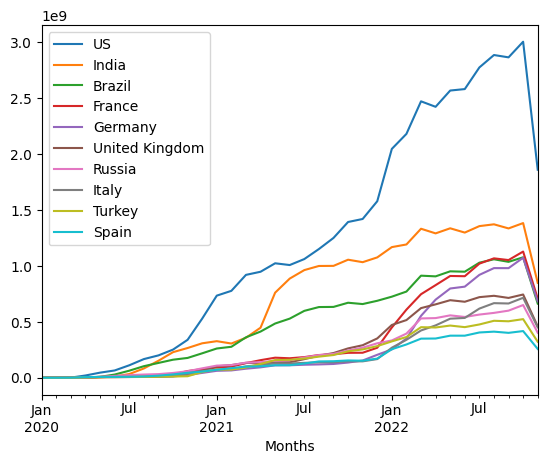

In [72]:
cases_confirmed = cases_confirmed[[col for col in cases_confirmed.columns[:10]]]
cases_confirmed.plot()

<Axes: title={'center': 'Covid-19 Total Confirmed cases'}, ylabel='Months'>

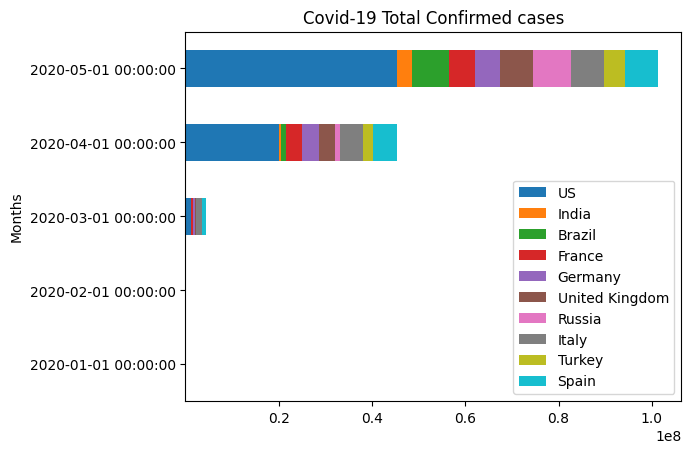

In [73]:
cases_confirmed.head().plot.barh(title= 'Covid-19 Total Confirmed cases', stacked = True)

This plot displays the total number of Covid-19 deaths across the world, shown through a bar graph.

<Axes: xlabel='Months'>

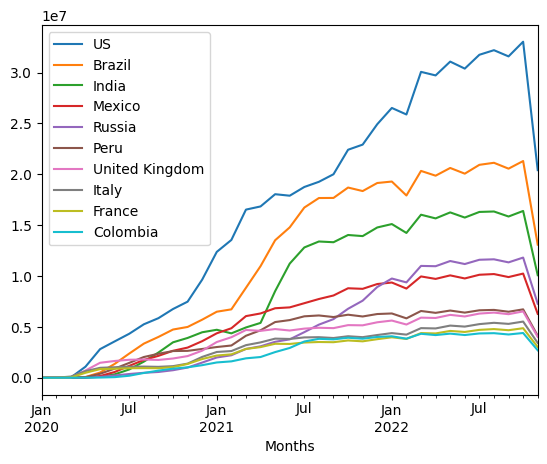

In [74]:
death_result = death_result[[col for col in death_result.columns[:10]]]
death_result.plot()

<Axes: title={'center': 'Covid-19 Total Death cases'}, ylabel='Months'>

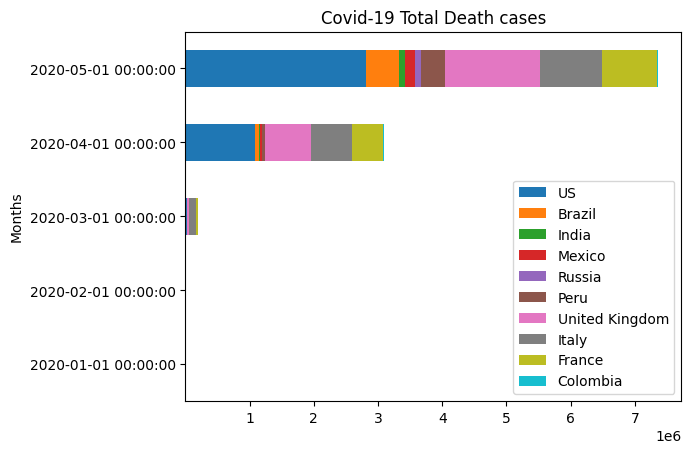

In [75]:
death_result.head().plot.barh(title= 'Covid-19 Total Death cases', stacked = True)

This plot show a clear figure of the overall trend of Covid Confirmed cases of first 10 columns

Basic Ploting & Plot.barh on Covid recovered cases across the world 

<Axes: xlabel='Months'>

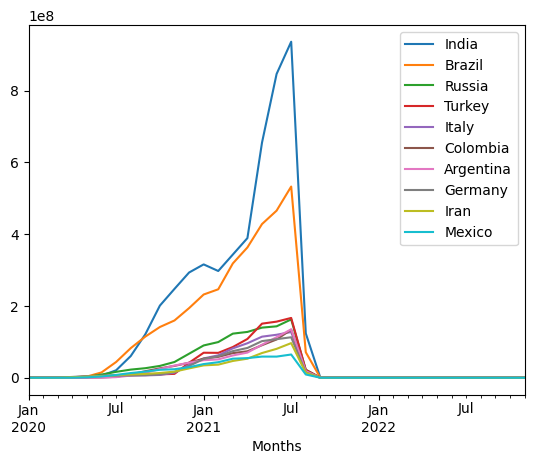

In [76]:
recovered_result = recovered_result[[col for col in recovered_result.columns[:10]]]
recovered_result.plot()

<Axes: title={'center': 'Covid-19 Total Recovered cases'}, ylabel='Months'>

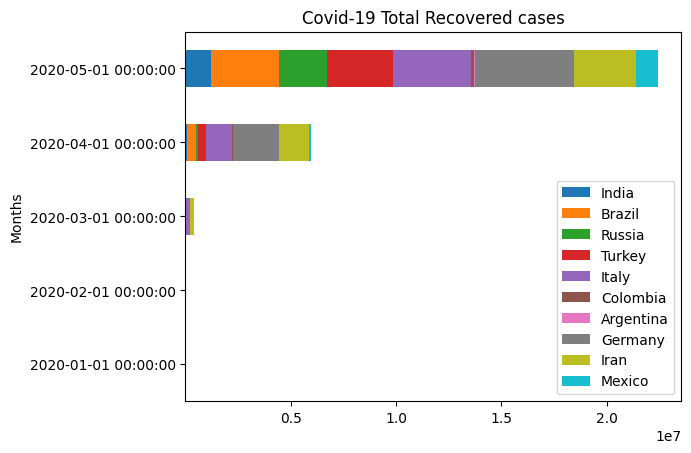

In [77]:
recovered_result.head().plot.barh(title= 'Covid-19 Total Recovered cases', stacked = True)

This bar graph illustrates the total number of confirmed, death, and recovered cases of Covid-19 in the first 10 countries worldwide.

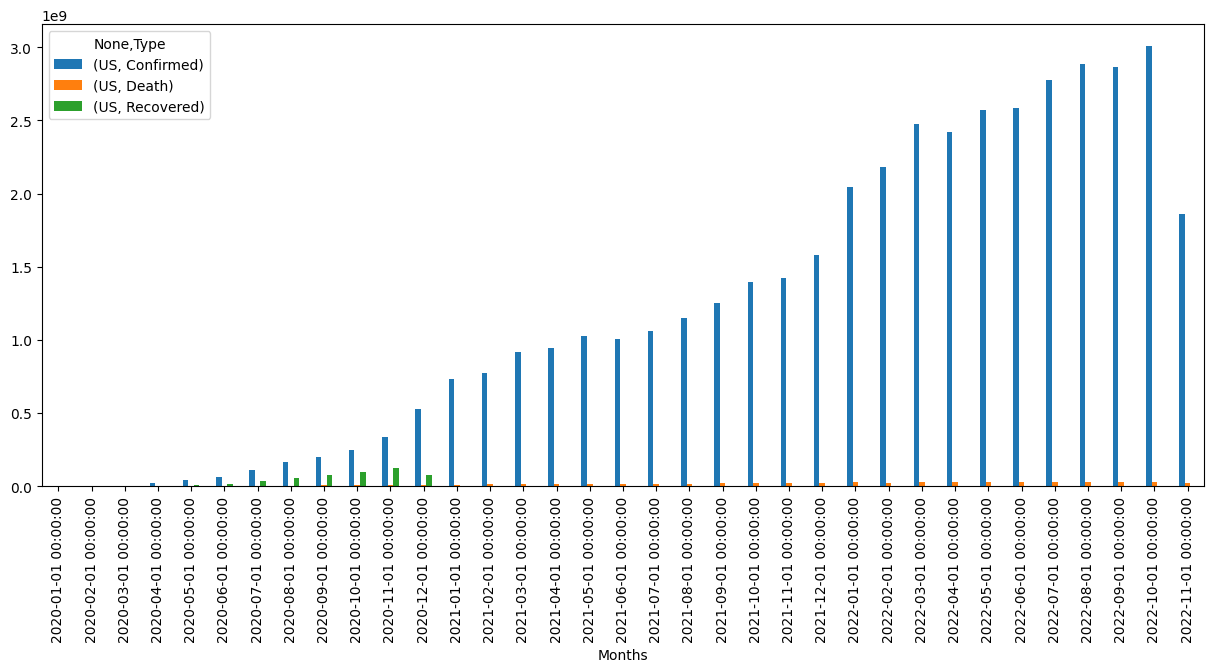

In [78]:
merged_data.plot.bar(figsize=(15, 6));

#Analyzing the trend of Covid confirmed cases, recoveries, and deaths over the years.
barh_plot = merged_data.groupby(merged_data.index.year).sum()

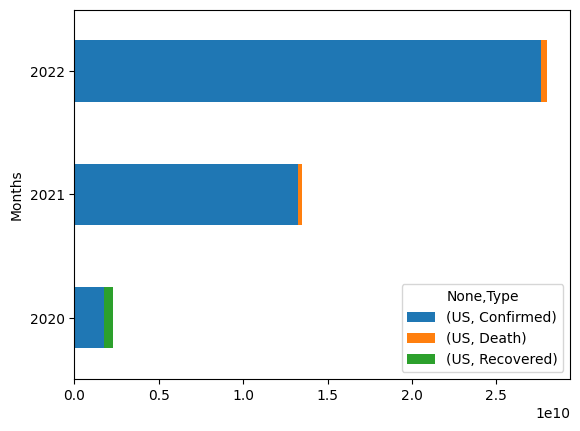

In [79]:
# Horizontal bar plot
barh_plot.plot.barh(stacked=True);

#2 TIME SERIES
# Plot the time series of Covid-19 cases in the United States, resampled over time.

In [80]:
start, end = '2020-01', '2022-11'

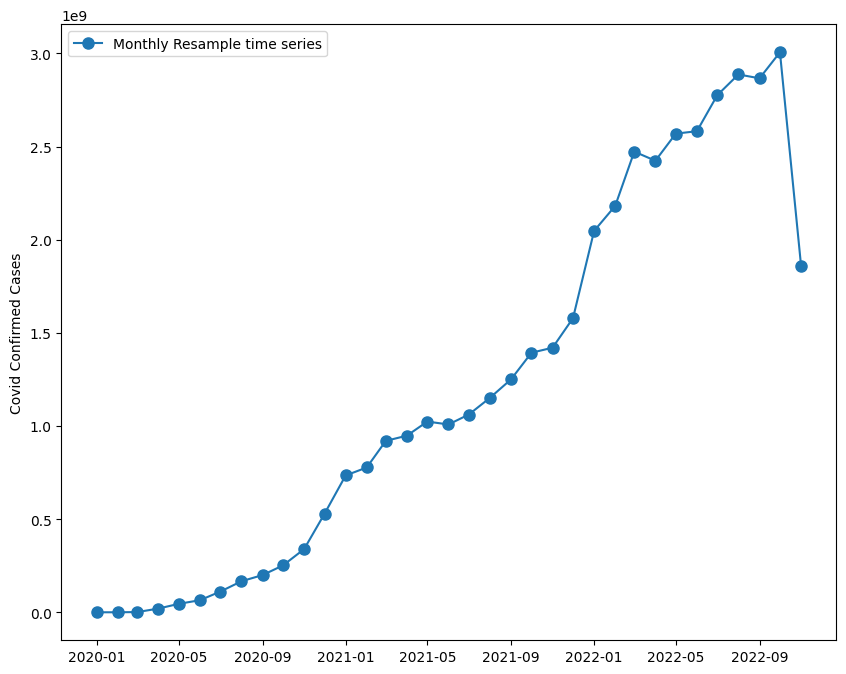

In [81]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(cases_confirmed.loc[start:end, 'US'],
marker='o', markersize=8, linestyle='-', label='Monthly Resample time series')
ax.set_ylabel('Covid Confirmed Cases')
ax.legend();

/var/folders/xn/b6j9nzwd1ydcxrtk5slsl2qm0000gn/T/ipykernel_5248/3439641535.py:5: FutureWarning:

The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

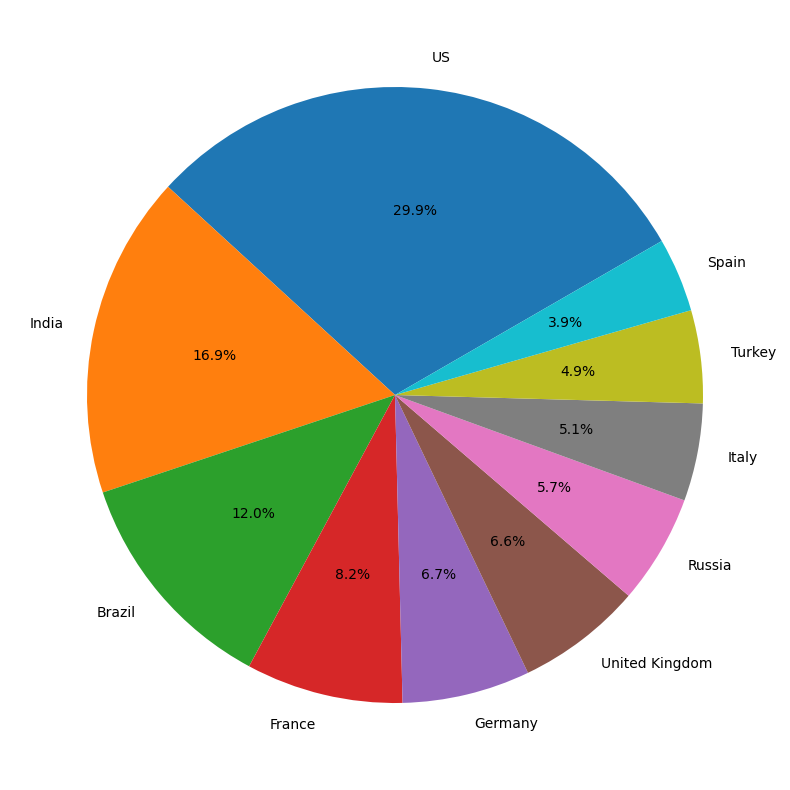

In [82]:
#Pie Charts are a great way to represent the proportion of different categories
#of inspections in a visual format.

pie_df = cases_confirmed.reset_index()
pie_df = pie_df.sum()
pie_df.plot(kind='pie',figsize=(10, 10), autopct='%1.1f%%', startangle=30, shadow=False)

In [85]:
px.density_heatmap(cases_confirmed, y="India", x="US", nbinsx=10, nbinsy=10, color_continuous_scale = 'viridis')